In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
SDSS_df = pd.read_csv("/Users/agurvich/Downloads/manga_ugr.csv",skiprows=1)

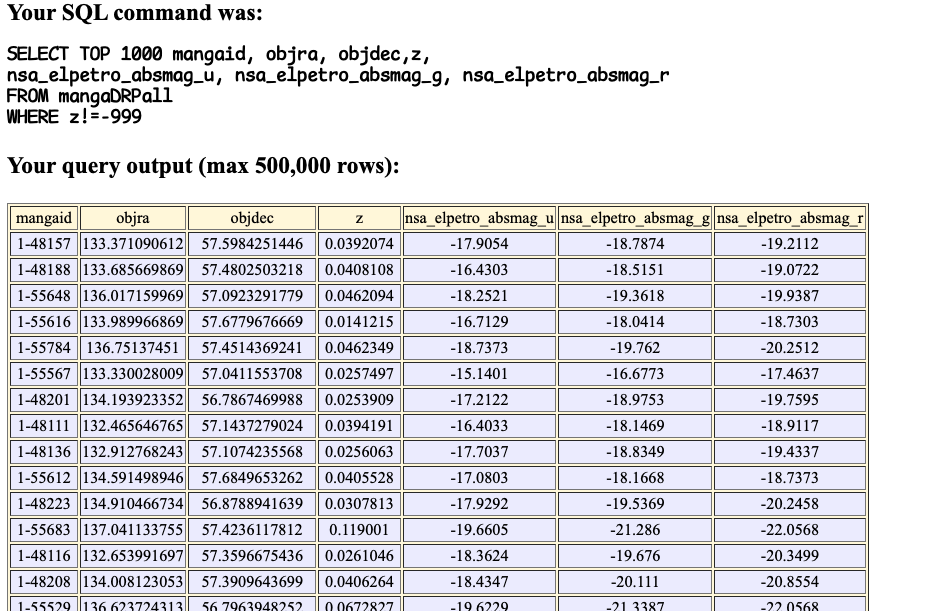

In [4]:
from astropy.coordinates import SkyCoord
from astropy.cosmology import Planck18 as cosmo

In [5]:
radec_coords = SkyCoord(SDSS_df.objra,SDSS_df.objdec,unit='deg')
coords = np.zeros((radec_coords.size,3))
coords[:,0] = radec_coords.cartesian.x
coords[:,1] = radec_coords.cartesian.y
coords[:,2] = radec_coords.cartesian.z


dists = np.array(cosmo.luminosity_distance(SDSS_df.z))
dists/=np.nanmean(dists)

coords*= dists[:,None]

/opt/homebrew/Caskroom/miniconda/base/envs/firefly/lib/python3.9/site-packages/astropy/cosmology/flrw.py:1072: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(self._inv_efunc_scalar, z1, z2, args=self._inv_efunc_scalar_args)[0]
/opt/homebrew/Caskroom/miniconda/base/envs/firefly/lib/python3.9/site-packages/numpy/lib/function_base.py:2246: RuntimeWarning: invalid value encountered in _integral_comoving_distance_z1z2_scalar (vectorized)
  outputs = ufunc(*inputs)


In [6]:
from abg_python.plot_utils import plt

palettable colormaps are not installed
don't have phil's colormaps


In [7]:
%matplotlib inline

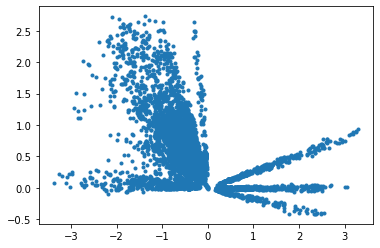

In [8]:
plt.plot(coords[:,0],coords[:,2],'.')

In [9]:
field_names = ['nsa_elpetro_absmag_u','nsa_elpetro_absmag_g','nsa_elpetro_absmag_r']
fields = np.zeros((len(field_names),coords.shape[0]))

for i,key in enumerate(field_names):
    fields[i,:] = SDSS_df[key]

In [10]:
SDSS_r = 10**(-np.array((SDSS_df.nsa_elpetro_absmag_r))/2.512)
SDSS_g = 10**(-np.array((SDSS_df.nsa_elpetro_absmag_g))/2.512)
SDSS_u = 10**(-np.array((SDSS_df.nsa_elpetro_absmag_u))/2.512)

/var/folders/87/2kv01skd4471fn2y8rcqj6700000gn/T/ipykernel_71973/2599620236.py:1: RuntimeWarning: overflow encountered in power
  SDSS_r = 10**(-np.array((SDSS_df.nsa_elpetro_absmag_r))/2.512)
/var/folders/87/2kv01skd4471fn2y8rcqj6700000gn/T/ipykernel_71973/2599620236.py:2: RuntimeWarning: overflow encountered in power
  SDSS_g = 10**(-np.array((SDSS_df.nsa_elpetro_absmag_g))/2.512)
/var/folders/87/2kv01skd4471fn2y8rcqj6700000gn/T/ipykernel_71973/2599620236.py:3: RuntimeWarning: overflow encountered in power
  SDSS_u = 10**(-np.array((SDSS_df.nsa_elpetro_absmag_u))/2.512)


In [11]:
good_mask = np.logical_and(
    ~np.any(np.isnan(coords),axis=1),
    np.isfinite(SDSS_r+SDSS_g+SDSS_u))
coords = coords[good_mask]
fields = fields[...,good_mask]
SDSS_r = SDSS_r[good_mask]
SDSS_g = SDSS_g[good_mask]
SDSS_u = SDSS_u[good_mask]

In [12]:
from firestudio.utils.stellar_utils import make_threeband_image_process_bandmaps

2198.9601379904634 4204999258.649511
8259.289236261668 2947046189.5603166
7606.664602583903 16583095626.12195


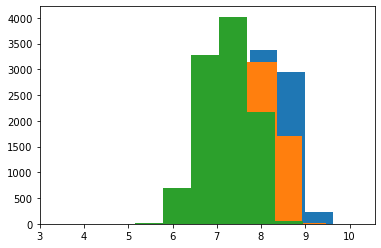

In [13]:

for band in [SDSS_r,SDSS_g,SDSS_u]:
    print(band.min(),band.max())
    plt.hist(np.log10(band))

In [14]:
solar_absmag = 4.83 ## <--- need this somewhere?
image, massmap = make_threeband_image_process_bandmaps(
    SDSS_r.reshape(1,-1), ## in units of solar luminosities
    SDSS_g.reshape(1,-1), ## in units of solar luminosities
    SDSS_u.reshape(1,-1), ## in units of solar luminosities
    maxden=1e10,
    dynrange=1e5)
image = image[0]
rgbas = np.zeros((image.shape[0],4))
rgbas[:,:3] = image
rgbas[:,-1] = 1

maxden ==  10000000000.0 dynrange ==  100000.0 minden ==  100000.0


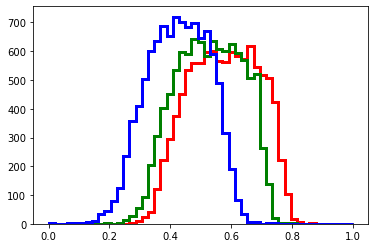

In [15]:
plt.hist(rgbas[:,0],histtype='step',lw=3,color='r',bins=np.linspace(0,1))
plt.hist(rgbas[:,1],histtype='step',lw=3,color='g',bins=np.linspace(0,1))
plt.hist(rgbas[:,2],histtype='step',lw=3,color='b',bins=np.linspace(0,1))
print()

# Format Data for Firefly

In [16]:
from firefly.data_reader import ArrayReader

In [17]:
my_arrayReader = ArrayReader(
    coords,
    fields=fields,
    field_names=field_names,
    write_to_disk=False,
    write_startup=True)
my_arrayReader.particleGroups[0].rgba_colors = rgbas
my_arrayReader.settings['camera'] = [0,0,-3]
my_arrayReader.settings['sizeMult']['PGroup_0'] = 0.05

my_arrayReader.writeToDisk()

JSONdir is None, defaulting to /Users/agurvich/research/repos/Firefly/src/firefly/static/data/Data
Make sure each field_array (3) has a field_filter_flag (0), assuming True.
Make sure each field_array (3) has a field_colormap_flag (0), assuming True.
Make sure each field_array (3) has a field_radius_flag (0), assuming False.
Outputting: PGroup_0 - 10246/10246 particles - 3 tracked fields


''

In [18]:
my_arrayReader.copyFireflySourceToTarget('SDSS_test',init_gh_pages=True)

Initializing a new GitHub repository at /Users/agurvich/SDSS_first_test with
	GHREPONAME: SDSS_first_test
	GHUSER: agurvich
	GHOAUTHTOKENPATH: /Users/agurvich/.github.token



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5863  100  5837  100    26   5021     22  0:00:01  0:00:01 --:--:--  5084
error: src refspec master does not match any
error: failed to push some refs to 'github.com:agurvich/SDSS_first_test.git'
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   221  100   180  100    41   1030    234 --:--:-- --:--:-- --:--:--  1315


['{',
 '  "id": 495846125,',
 '  "node_id": "R_kgDOHY4C7Q",',
 '  "name": "SDSS_first_test",',
 '  "full_name": "agurvich/SDSS_first_test",',
 '  "private": false,',
 '  "owner": {',
 '    "login": "agurvich",',
 '    "id": 7799423,',
 '    "node_id": "MDQ6VXNlcjc3OTk0MjM=",',
 '    "avatar_url": "https://avatars.githubusercontent.com/u/7799423?v=4",',
 '    "gravatar_id": "",',
 '    "url": "https://api.github.com/users/agurvich",',
 '    "html_url": "https://github.com/agurvich",',
 '    "followers_url": "https://api.github.com/users/agurvich/followers",',
 '    "following_url": "https://api.github.com/users/agurvich/following{/other_user}",',
 '    "gists_url": "https://api.github.com/users/agurvich/gists{/gist_id}",',
 '    "starred_url": "https://api.github.com/users/agurvich/starred{/owner}{/repo}",',
 '    "subscriptions_url": "https://api.github.com/users/agurvich/subscriptions",',
 '    "organizations_url": "https://api.github.com/users/agurvich/orgs",',
 '    "repos_url": "ht